# Proyecto Final - Aprendizaje Automático - Diego Estrada

## Problema de interés de analisis: Tipos de Violencia de Género en Llamadas a la Línea 144

El conjunto de datos utilizado en este proyecto fue obtenido del portal oficial datos.gob.ar. Este conjunto está compuesto por cuatro datasets correspondientes a distintos años, los cuales contienen registros de llamadas telefónicas realizadas por personas que han sufrido algún tipo de violencia interpersonal.
Durante estas llamadas, atendidas a través de la línea 114, los operadores realizan una serie de preguntas a la persona afectada con el fin de registrar detalladamente la situación.
El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje supervisado que permita predecir, a partir del registro de una llamada, si se trata de un caso de violencia de género y clasificarlos. Esto permitiría una detección temprana y una derivación más rápida a las autoridades competentes.

### 1* Carga y Exploración de Datos (Data Loading & Exploration)

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Definimos una ruta base absoluta para levantar los 4 dataset
ruta_base = 'C:\\Users\\destrada\\Ciencia_datos_2A1C\\Cookiecutter_Proyecto_Final\\data\\'

#Verificamos si la ruta existe para evitar falla de localizacion de archivos, con la condicion IF validamos la existencia de ruta.
if os.path.exists(ruta_base):
    # Cargamos los datasets
    df1 = pd.read_csv(ruta_base + 'linea144-2020.csv')
    df2 = pd.read_csv(ruta_base + 'linea144-2021.csv')
    df3 = pd.read_csv(ruta_base + 'linea144-2022.csv')
    df4 = pd.read_csv(ruta_base + 'linea144-2023.csv')

    #Concatenamos los dataframes en uno solo Dataframe
    df_final = pd.concat([df1, df2, df3, df4], ignore_index=True)
else:
    #En caso de no encontrar los archivos en la ruta, mostraria este mensaje.
    print("La ruta especificada no existe.")
    
#Mostramos las primeras filas del DataFrame unificado
df_final.head()


,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,...,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,Fecha,Unnamed: 19
0,2020-01-01,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,...,No,No,No,No,No,No,Pareja,Varon,NaN,NaN
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,...,No,No,No,No,No,No,Ex pareja,Varon,NaN,NaN
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,...,No,No,No,No,No,No,Ex pareja,Varon,NaN,NaN
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,...,No,No,No,No,No,No,Pareja,Varon,NaN,NaN
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,...,No,No,No,No,No,No,Pareja,Varon,NaN,NaN


In [5]:
#Queremos conocer la cantidad de registros en el DataFrame Unificado
num_registros = df_final.shape[0]
print("Cantidad de registros: " + str(num_registros))

#Cantidad de columnas
num_columnas = df_final.shape[1]
print("Cantidad de columnas: " + str(num_columnas))

Cantidad de registros: 89540
Cantidad de columnas: 21


##  Preprocesamiento de Datos (Data Preprocessing)
Vamos a trabajar en el proceso de ETL, después que unificamos los datos, eliminaremos algunas columnas que no necesitamos analizar, lo que también mejorará el rendimiento del modelo que vamos a desarrollar.

In [7]:
#Estantarizamos los nombre de las columnas
df_final.columns = df_final.columns.str.lower()

#Eliminamos la columna 'fecha' si existe. Con la condicion IF validamos
if 'fecha' in df_final.columns:
    df_final = df_final.drop(columns=['fecha'])
else:
    #En caso de no encontrar la columna, mostraria este mensaje.
    print("No existe la columna.")

#Vamos a eliminar la columna 'unnamed: 19' que es una columna vacia
if 'unnamed: 19' in df_final.columns:
    df_final = df_final.drop(columns=['unnamed: 19'])
else:
    print("No existe la columna 'unnamed: 19'.")
    
#Mostramos las primeras filas del DataFrame unificado sin la columna "Fecha"
df_final.head()

,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon


In [9]:
#Validamos si tenemos valores nulos en cada columnas
valores_nulos = df_final.isnull().sum()
print(valores_nulos)

prov_residencia_persona_en_situacion_violencia        1175
genero_persona_en_situacion_de_violencia              1915
edad_persona_en_situacion_de_violencia               17288
pais_nacimiento_persona_en_situacion_de_violencia    30291
tipo_de_violencia_fisica                                11
tipo_de_violencia_psicologica                           11
tipo_de_violencia_sexual                                11
tipo_de_violencia_economica_y_patrimonial               11
tipo_de_violencia_simbolica                             11
tipo_de_violencia_domestica                             11
modalidad_de_violencia_institucional                    11
modalidad_de_violencia_laboral                          11
modalidad_violencia_contra_libertad_reproductiva        11
modalidad_de_violencia_obstetrica                       11
modalidad_de_violencia_mediatica                        11
modalidad_de_violencia_otras                            11
vinculo_con_la_persona_agresora                       34

Se encontraron valores nulos en todas las columnas, por lo que necesitamos tratarlos utilizando diferentes métodos. Comenzaremos eliminando las filas con valores nulos en algunas columnas, ya que no afectan significativamente el volumen de nuestro conjunto de datos.

In [11]:
#Eliminamos valores nulos de algunas columnas.
df_final = df_final.dropna(subset=["tipo_de_violencia_fisica","tipo_de_violencia_psicologica","tipo_de_violencia_sexual","tipo_de_violencia_economica_y_patrimonial",
                                  "tipo_de_violencia_simbolica","tipo_de_violencia_domestica","modalidad_de_violencia_institucional","modalidad_de_violencia_laboral",
                                  "modalidad_violencia_contra_libertad_reproductiva","modalidad_de_violencia_obstetrica","modalidad_de_violencia_mediatica","modalidad_de_violencia_otras"])

Como seguimos teniendo columnas con valores nulos y no queremos perder datos en aquellas que necesitamos completas, vamos a trabajar con la columna "edad_persona_en_situacion_de_violencia". Utilizaremos la "Mediana" para completar los valores nulos, ya que es menos sensible a los valores extremos (outliers) que el promedio y suele presentar una mejor tendencia central en datos sesgados.

In [13]:
#Calculamos la mediana de edad
mediana_edad = df_final['edad_persona_en_situacion_de_violencia'].median()
#Completamos los valores faltantes y convertimos a int64
df_final['edad_persona_en_situacion_de_violencia'] = df_final['edad_persona_en_situacion_de_violencia'].fillna(mediana_edad).astype('int64')

In [15]:
#Revisamos nuevamente los valores nulos en las columnas del dataframe
valores_nulos = df_final.isnull().sum()
print(valores_nulos)

prov_residencia_persona_en_situacion_violencia        1164
genero_persona_en_situacion_de_violencia              1904
edad_persona_en_situacion_de_violencia                   0
pais_nacimiento_persona_en_situacion_de_violencia    30280
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                         0
modalidad_de_violencia_otras                             0
vinculo_con_la_persona_agresora                       33

Volvimos a revisar cómo quedaron las columnas con valores nulos, y nos queda darle tratamiento a "prov_residencia_persona_en_situacion_violencia", "genero_persona_en_situacion_de_violencia", "pais_nacimiento_persona_en_situacion_de_violencia", "vinculo_con_la_persona_agresora" y "genero_de_la_persona_agresora". En estos casos, al ser columnas categóricas, podríamos reemplazar los valores nulos con la "Moda" de cada columna. Esto evitaría distorsionar los datos, preservaría la frecuencia relativa de las categorías y si aplicaramos otra técnica como introducir valores nuevos, podría hacer que nuestro modelo no funcione correctamente.

In [17]:
#Para la columna 'prov_residencia_persona_en_situacion_violencia'
provincia_moda = df_final['prov_residencia_persona_en_situacion_violencia'].mode()[0]
df_final['prov_residencia_persona_en_situacion_violencia'] = df_final['prov_residencia_persona_en_situacion_violencia'].fillna(provincia_moda)

#Para la columna 'genero_persona_en_situacion_de_violencia'
genero_moda = df_final['genero_persona_en_situacion_de_violencia'].mode()[0]
df_final['genero_persona_en_situacion_de_violencia'] = df_final['genero_persona_en_situacion_de_violencia'].fillna(genero_moda)

#Para la columna 'pais_nacimiento_persona_en_situacion_de_violencia'
pais_moda = df_final['pais_nacimiento_persona_en_situacion_de_violencia'].mode()[0]
df_final['pais_nacimiento_persona_en_situacion_de_violencia'] = df_final['pais_nacimiento_persona_en_situacion_de_violencia'].fillna(pais_moda)

#Para la columna 'vinculo_con_la_persona_agresora'
vinculo_moda = df_final['vinculo_con_la_persona_agresora'].mode()[0]
df_final['vinculo_con_la_persona_agresora'] = df_final['vinculo_con_la_persona_agresora'].fillna(vinculo_moda)

#Para la columna 'genero_de_la_persona_agresora'
genero_agresor_moda = df_final['genero_de_la_persona_agresora'].mode()[0]
df_final['genero_de_la_persona_agresora'] = df_final['genero_de_la_persona_agresora'].fillna(genero_agresor_moda)

#Volvemos a revisar los valores nulos
valores_nulos = df_final.isnull().sum()
print(valores_nulos)

prov_residencia_persona_en_situacion_violencia       0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_con_la_persona_agresora                      0
genero_de_la_persona_agresora                        0
dtype: int

In [19]:
#Obtenemos los tipos de variables que tienen las columnas
df_final.dtypes

prov_residencia_persona_en_situacion_violencia       object
genero_persona_en_situacion_de_violencia             object
edad_persona_en_situacion_de_violencia                int64
pais_nacimiento_persona_en_situacion_de_violencia    object
tipo_de_violencia_fisica                             object
tipo_de_violencia_psicologica                        object
tipo_de_violencia_sexual                             object
tipo_de_violencia_economica_y_patrimonial            object
tipo_de_violencia_simbolica                          object
tipo_de_violencia_domestica                          object
modalidad_de_violencia_institucional                 object
modalidad_de_violencia_laboral                       object
modalidad_violencia_contra_libertad_reproductiva     object
modalidad_de_violencia_obstetrica                    object
modalidad_de_violencia_mediatica                     object
modalidad_de_violencia_otras                         object
vinculo_con_la_persona_agresora         

Es importante analisar las columnas de tipo 'object', ya que esta variables son categóricas y pueden contener valores escritos de forma inconsistente, como diferencias entre mayúsculas, minúsculas o combinaciones de ambas. Para evitar estos errores en el análisis y asegurar una codificación correcta, vamos a estandarizar estos valores convirtiéndolos todos a un mismo formato, todo en minúsculas.

In [21]:
#Convertimos a minúscula todas las columnas tipo object, para evitar tipografia incorrecta antes de avanzar en convertir las variables categoticas a número
import unicodedata

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.lower().strip()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto
    return texto

for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].apply(limpiar_texto)

Como ya estandarizamos nuestras columnas, el siguiente paso sera convertir las variables categóricas a formato numérico. Esta transformación la tenemos que hacer porque el algoritmos de aprendizaje automático requieren datos numéricos para funcionar correctamente y lograr un mejor rendimiento.
Primero identificamos las columnas que contienen únicamente las respuestas “sí” o “no” y las convertimos a valores binarios (1 para "sí" y 0 para "no").
Segundo paso, para las columnas categóricas que tienen múltiples valores sin un orden específico, aplicamos el método One-Hot Encoding que genera nuevas columnas binarias para cada categoría posible.

In [23]:
#Transformamos variables categóricas
#Convertir columnas binarias sí/no a 1 y 0
columnas_binarias = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_domestica',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'modalidad_de_violencia_institucional',
    'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva',
    'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica',
    'modalidad_de_violencia_otras'
]

for col in columnas_binarias:
    df_final[col] = df_final[col].str.lower().map({'sí': 1, 'si': 1, 'no': 0})

#One-Hot Encoding solo a las siguientes columnas
columnas_a_codificar = [
    'genero_persona_en_situacion_de_violencia',
    'vinculo_con_la_persona_agresora',
    'genero_de_la_persona_agresora'
]

df_final = pd.get_dummies(df_final, columns=columnas_a_codificar, drop_first=False)
df_final.head(10)

,prov_residencia_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,...,vinculo_con_la_persona_agresora_superior jerarquico,genero_de_la_persona_agresora_mujer,genero_de_la_persona_agresora_mujer trans,genero_de_la_persona_agresora_no binarie,genero_de_la_persona_agresora_otro,genero_de_la_persona_agresora_queer,genero_de_la_persona_agresora_transgenero,genero_de_la_persona_agresora_travesti,genero_de_la_persona_agresora_varon,genero_de_la_persona_agresora_varon trans
0,tucuman,34,argentina,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
1,buenos aires,39,argentina,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,buenos aires,22,argentina,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,buenos aires,53,argentina,0,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,buenos aires,38,argentina,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5,buenos aires,23,argentina,1,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
6,santiago del estero,25,paraguaya,1,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
7,santa fe,24,argentina,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
8,santa fe,34,argentina,1,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
9,san juan,21,argentina,1,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [25]:
#Obtenemos los tipos de variables que tienen las columnas
df_final.dtypes

prov_residencia_persona_en_situacion_violencia          object
edad_persona_en_situacion_de_violencia                   int64
pais_nacimiento_persona_en_situacion_de_violencia       object
tipo_de_violencia_fisica                                 int64
tipo_de_violencia_psicologica                            int64
tipo_de_violencia_sexual                                 int64
tipo_de_violencia_economica_y_patrimonial                int64
tipo_de_violencia_simbolica                              int64
tipo_de_violencia_domestica                              int64
modalidad_de_violencia_institucional                     int64
modalidad_de_violencia_laboral                           int64
modalidad_violencia_contra_libertad_reproductiva         int64
modalidad_de_violencia_obstetrica                        int64
modalidad_de_violencia_mediatica                         int64
modalidad_de_violencia_otras                             int64
genero_persona_en_situacion_de_violencia_intersexual   

In [27]:
#Realizamos analisis estadístico
print("\nResumen estadístico:")
print(df_final.describe())


Resumen estadístico:
       edad_persona_en_situacion_de_violencia  tipo_de_violencia_fisica  \
count                            89529.000000              89529.000000   
mean                                35.362173                  0.658502   
std                                 11.336169                  0.474215   
min                                  1.000000                  0.000000   
25%                                 28.000000                  0.000000   
50%                                 34.000000                  1.000000   
75%                                 40.000000                  1.000000   
max                                127.000000                  1.000000   

       tipo_de_violencia_psicologica  tipo_de_violencia_sexual  \
count                   89529.000000              89529.000000   
mean                        0.949201                  0.136682   
std                         0.219589                  0.343513   
min                         0.000000  

In [29]:
#Queremos conocer nuevamente como quedo la cantidad de registros en el DataFrame Unificado
num_registros = df_final.shape[0]
print("Cantidad de registros: " + str(num_registros))

#Cantidad de columnas
num_columnas = df_final.shape[1]
print("Cantidad de columnas: " + str(num_columnas))

Cantidad de registros: 89529
Cantidad de columnas: 41


Durante el proceso de limpieza y transformación de los datos (ETL), se partió de un conjunto unificado con por 21 columnas y 89.540 registros. Tras aplicar las etapas de ETL, el dataset final quedó conformado por 41 columnas y 89.529 registros. Se eliminaron tres columnas, una denominada “fecha”, que contenía 34.533 valores nulos y otras dos columnas, “Fecha” y “Unnamed: 19”, que estaban completamente vacías. Estas columnas fueron descartadas por no aportar valor predictivo al modelo y con el objetivo de simplificar la estructura del conjunto de datos y reducir el ruido. Además se eliminaron 11 registros (equivalentes al 0,012% del total) que presentaban valores faltantes en todas sus columnas, una pérdida mínima que no compromete la representatividad del conjunto. También se llevaron a cabo transformaciones clave para preparar los datos para el modelo de aprendizaje supervisado, incluyendo la estandarización de variables categóricas y su conversión a formato One-Hot Encoding, lo que facilitara la interpretación por parte del algoritmos que utilicemos.

## Análisis Exploratorio de Datos (Exploratory Data Analysis - EDA)

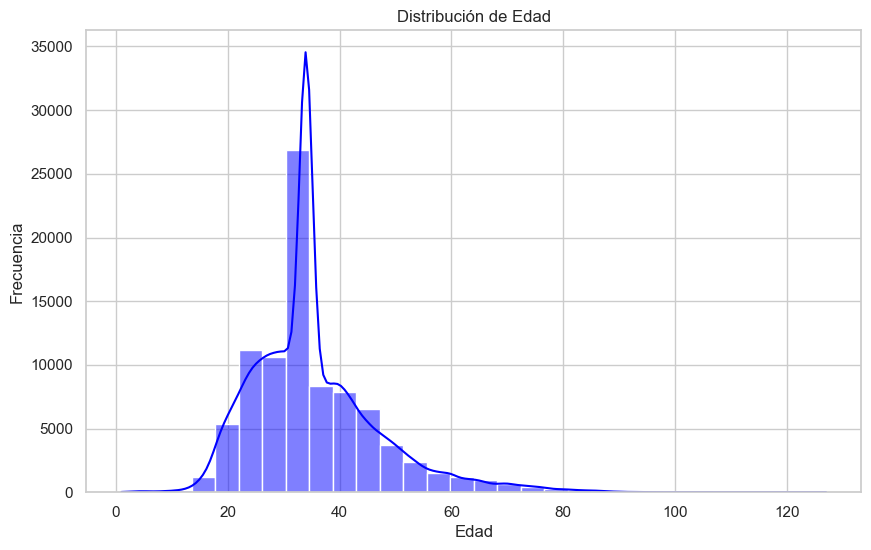

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configuracion general
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

#Graficaremos un Histograma para ver la distribucion de las edades
plt.figure()
sns.histplot(df_final['edad_persona_en_situacion_de_violencia'], bins=30, kde=True, color='blue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

El análisis de la distribución por edad revela que la mayoría de los llamados por violencia se concentran entre los 20 y 40 años, con un pico destacado alrededor de los 25 años. Esto sugiere que los adultos jóvenes son el grupo más afectado o más activo en reportar estos incidentes. Además se observan algunos valores atípicos (outliers) en edades extremas, los cuales serán analizados en mayor detalle.

Cantidad de valores atípicos: 4248


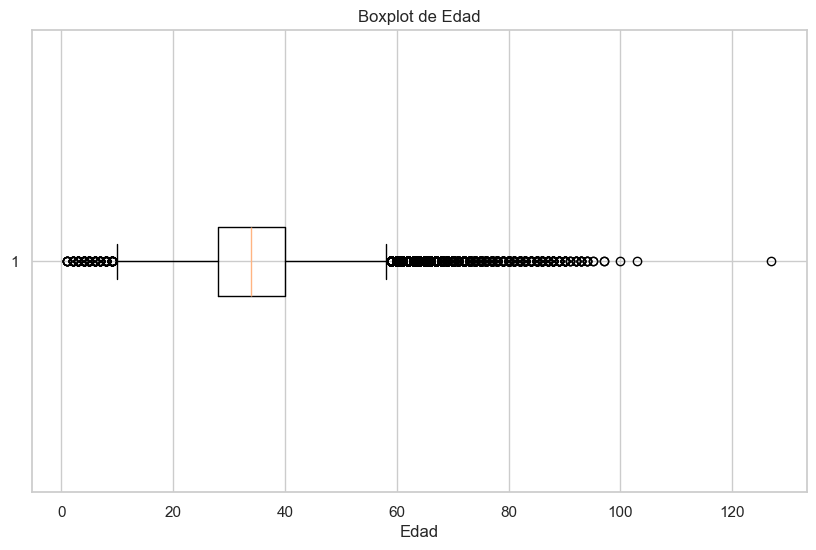

In [32]:
#Analizamos los valores atípicos en la edad
#Seleccionamos la columna
edad = df_final['edad_persona_en_situacion_de_violencia']

#Calculamos Q1 (percentil 25) y Q3 (percentil 75)
Q1 = edad.quantile(0.25)
Q3 = edad.quantile(0.75)
IQR = Q3 - Q1

#Límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Filtramos los outliers
outliers = edad[(edad < limite_inferior) | (edad > limite_superior)]

print(f"Cantidad de valores atípicos: {outliers.count()}")

#Gráficamos boxplot para visualizarlos más rapido
plt.boxplot(edad, vert=False)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

El análisis del boxplot de edad permitió identificar la presencia de valores atípicos, la mayoría de los datos se concentran dentro del rango intercuartílico, lo que indica una distribución relativamente estable en torno a las edades más frecuentes. Tambien se observan varios puntos fuera de los límites de los bigotes del gráfico, los cuales representan edades que se alejan significativamente del patrón general. Estos valores atípicos podrían corresponder a casos diferentes, como llamados realizados por personas muy jóvenes o muy mayores y podrían ser indicativos de situaciones particulares que merecen un análisis más detallado, también podria ser posible que algunos de estos valores reflejen errores en la carga de datos por parte de los operadores que reciben los llamados. 
Dado que en este proyecto no se utilizará la variable edad como parte del modelo, no será necesario aplicar un tratamiento específico a estos valores atípicos.

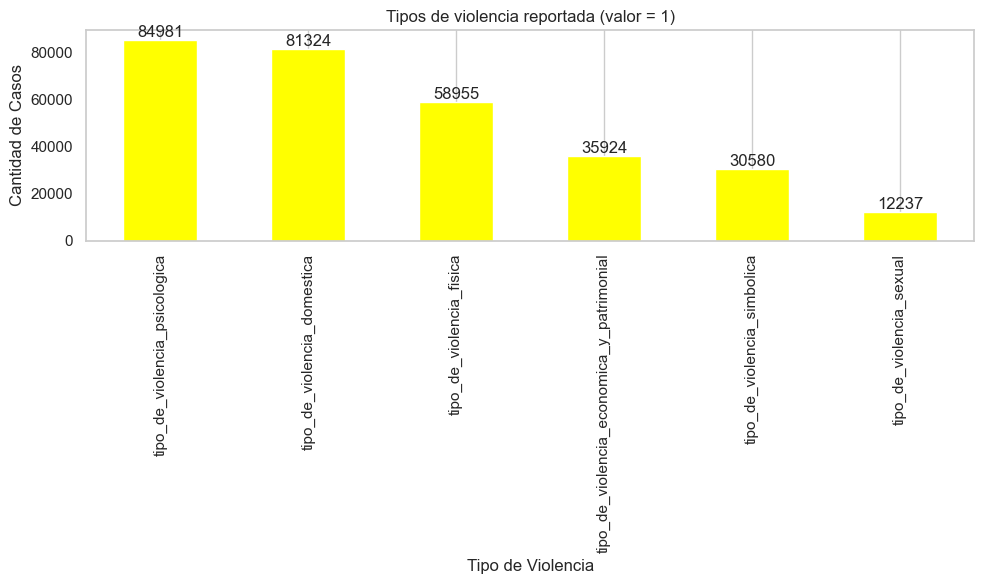

In [34]:
#Distribución de casos según el tipo de violencia
#Lista de columnas que representan tipos de violencia
tipos_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica']

#Contamos la cantidad de casos positivos (valor 1)
conteo = df_final[tipos_violencia].sum().sort_values(ascending=False)

#Graficamos
plt.figure(figsize=(10, 6))
ax = conteo.plot(kind='bar', color='Yellow')
plt.title("Tipos de violencia reportada (valor = 1)")
plt.xlabel("Tipo de Violencia")
plt.ylabel("Cantidad de Casos")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

#Agregar con el ciclo la cantidad en cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

El gráfico presenta la distribución de casos según el tipo de violencia reportada. Se observa que la violencia psicológica es la más frecuente, con un total de 84.981 casos, seguida muy de cerca por la violencia doméstica, con 81.324 casos. Esta distribución nos sugiere que las formas de violencia más invisibles o menos físicas, como la psicológica y la simbólica, tienen una presencia significativa en los reportes, lo que podría reflejar una mayor concientización sobre estas problemáticas o una mayor disposición a denunciarlas.

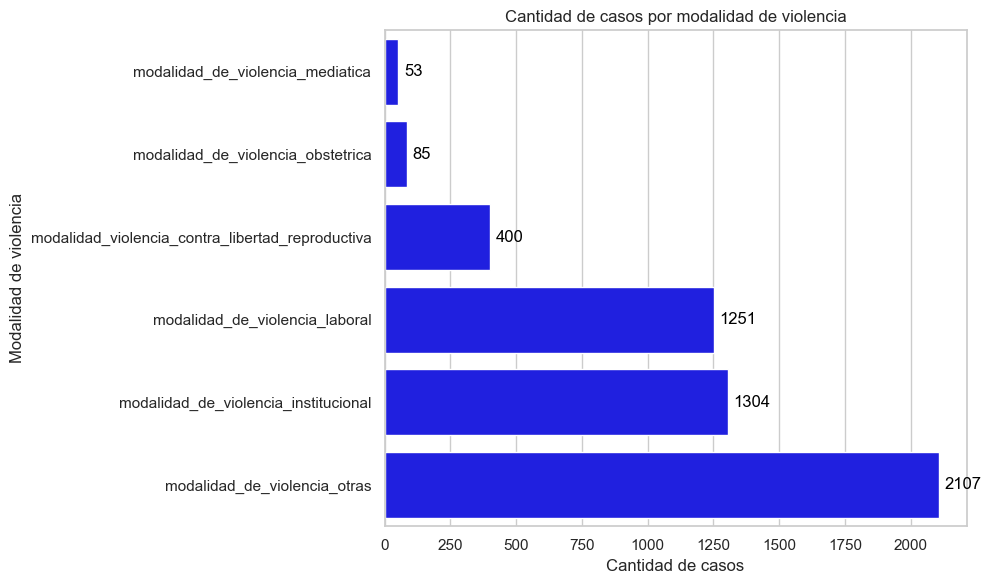

In [36]:
#Distribución de casos según la modalidad de violencia
#Primero sumamos cada modalidad para obtener la cantidad total de casos por modalidad
modalidad_cols = [
    'modalidad_de_violencia_institucional',
    'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva',
    'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica',
    'modalidad_de_violencia_otras'
]

modalidad_sumas = df_final[modalidad_cols].sum().sort_values()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=modalidad_sumas.values, y=modalidad_sumas.index, color='blue')

#Agregamos con el ciclo la cantidad en cada barra
for i, v in enumerate(modalidad_sumas.values):
    ax.text(v + max(modalidad_sumas.values)*0.01, i, str(v), color='black', va='center')

plt.title("Cantidad de casos por modalidad de violencia")
plt.xlabel("Cantidad de casos")
plt.ylabel("Modalidad de violencia")
plt.tight_layout()
plt.show()

La gráfica presenta la distribución de casos según la modalidad de violencia reportada. Se observa que la categoría con mayor cantidad de registros es "otras", con 2107 casos, lo que sugiere una agrupación de situaciones que no encajan en las clasificaciones específicas disponibles. Le siguen la violencia institucional (1304 casos) y la violencia laboral (1251 casos), ambas con una presencia significativa. Al contrario las modalidades como la violencia contra la libertad reproductiva (400 casos), la violencia obstétrica (85 casos) y la violencia médica (53 casos) presentan una frecuencia considerablemente menor. Esta distribución evidencia una concentración de casos en categorías generales o institucionales, lo que podría reflejar tanto patrones reales de ocurrencia como posibles limitaciones en la forma en que se están clasificando los datos.

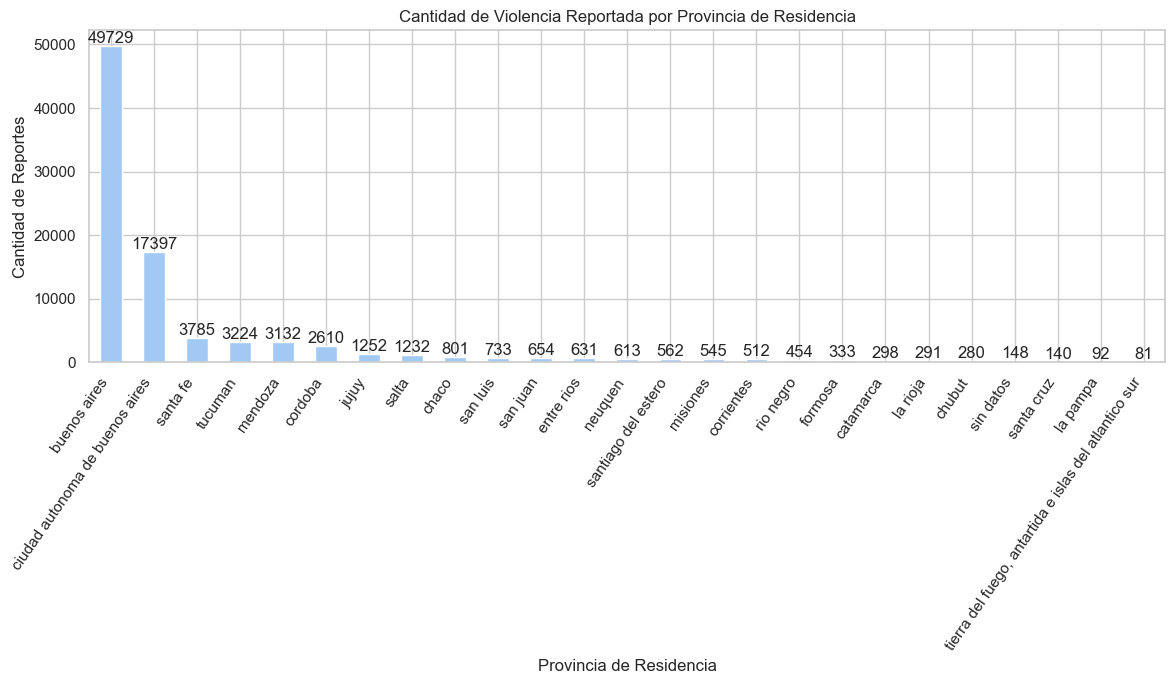

In [48]:
#La siguiente grafica genera una distribución entre las cantidades de violencia reportada y con las diferentes Provincias
provincia_counts = df_final['prov_residencia_persona_en_situacion_violencia'].value_counts()

plt.figure(figsize=(12, 7)) 
bars = provincia_counts.plot(kind='bar')
plt.title('Cantidad de Violencia Reportada por Provincia de Residencia')
plt.xlabel('Provincia de Residencia')
plt.ylabel('Cantidad de Reportes')
plt.xticks(rotation=55, ha='right')

#Añadimos las etiquetas de cantidad en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom') 
    
plt.tight_layout()
plt.show()

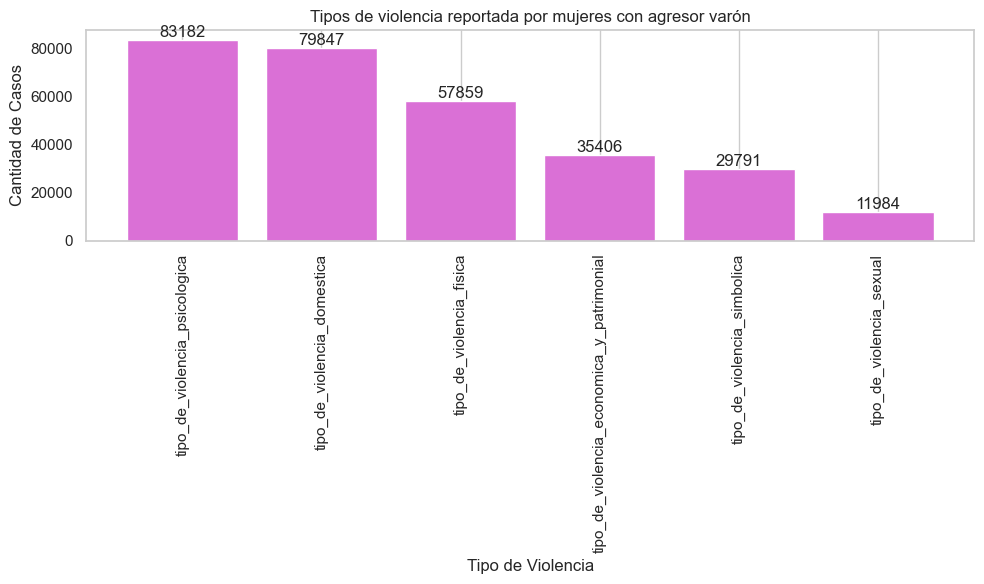

In [72]:
#Grafica de tipo de violencia que sufre la mujer en manos del varón
#Listamos los tipos de violencia
tipos_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica']

#Filtramos casos donde la persona en situación de violencia es mujer y el agresor es varón
df_mujer_varon = df_final[
    (df_final['genero_persona_en_situacion_de_violencia_mujer'] == True) &
    (df_final['genero_de_la_persona_agresora_varon'] == True)]

#Calculamos la suma de cada tipo de violencia
conteo = df_mujer_varon[tipos_violencia].sum().sort_values(ascending=False)

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo.index, conteo.values, color='orchid')
plt.title("Tipos de violencia reportada por mujeres con agresor varón")
plt.xlabel("Tipo de Violencia")
plt.ylabel("Cantidad de Casos")
plt.xticks(rotation=90)
plt.grid(axis='y')

#Agregamos etiquetas con los cantidad en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

El siguiente gráfico analiza los casos reportados por mujeres que han sufrido violencia ejercida por varones. Esta perspectiva se enmarca en la legislación argentina, particularmente en la Ley 26.485, que define la *"violencia contra las mujeres" como toda conducta, acción u omisión basada en una relación desigual de poder, que afecte su vida, libertad, dignidad, integridad física, psicológica, sexual, económica o patrimonial, así como su seguridad personal. También incluye la violencia indirecta que coloque a las mujeres en una situación de desventaja respecto de los varones.*
Los datos reflejan que la violencia psicológica y la violencia doméstica son las más frecuentemente reportadas. Esto puede estar relacionado tanto con su alta incidencia como con una mayor visibilización y conciencia social sobre estas formas de violencia. Al contrario, la violencia sexual, a pesar de su gravedad, presenta una menor cantidad de reportes, lo cual podría estar vinculado al miedo, la estigmatización o las dificultades que enfrentan las víctimas para denunciar estos hechos.

Link Gobierno Argentino: https://www.argentina.gob.ar/sites/default/files/ley_26485_violencia_familiar.pdf

Link Gobierno TDF: https://legistdf.gob.ar/lp/leyes/Provinciales/LEYP1022.pdf

Link de audio con PDF en NotebookLM: https://notebooklm.google.com/notebook/f84dfb8b-b408-4436-97ce-4bf6ff752ef3/audio 

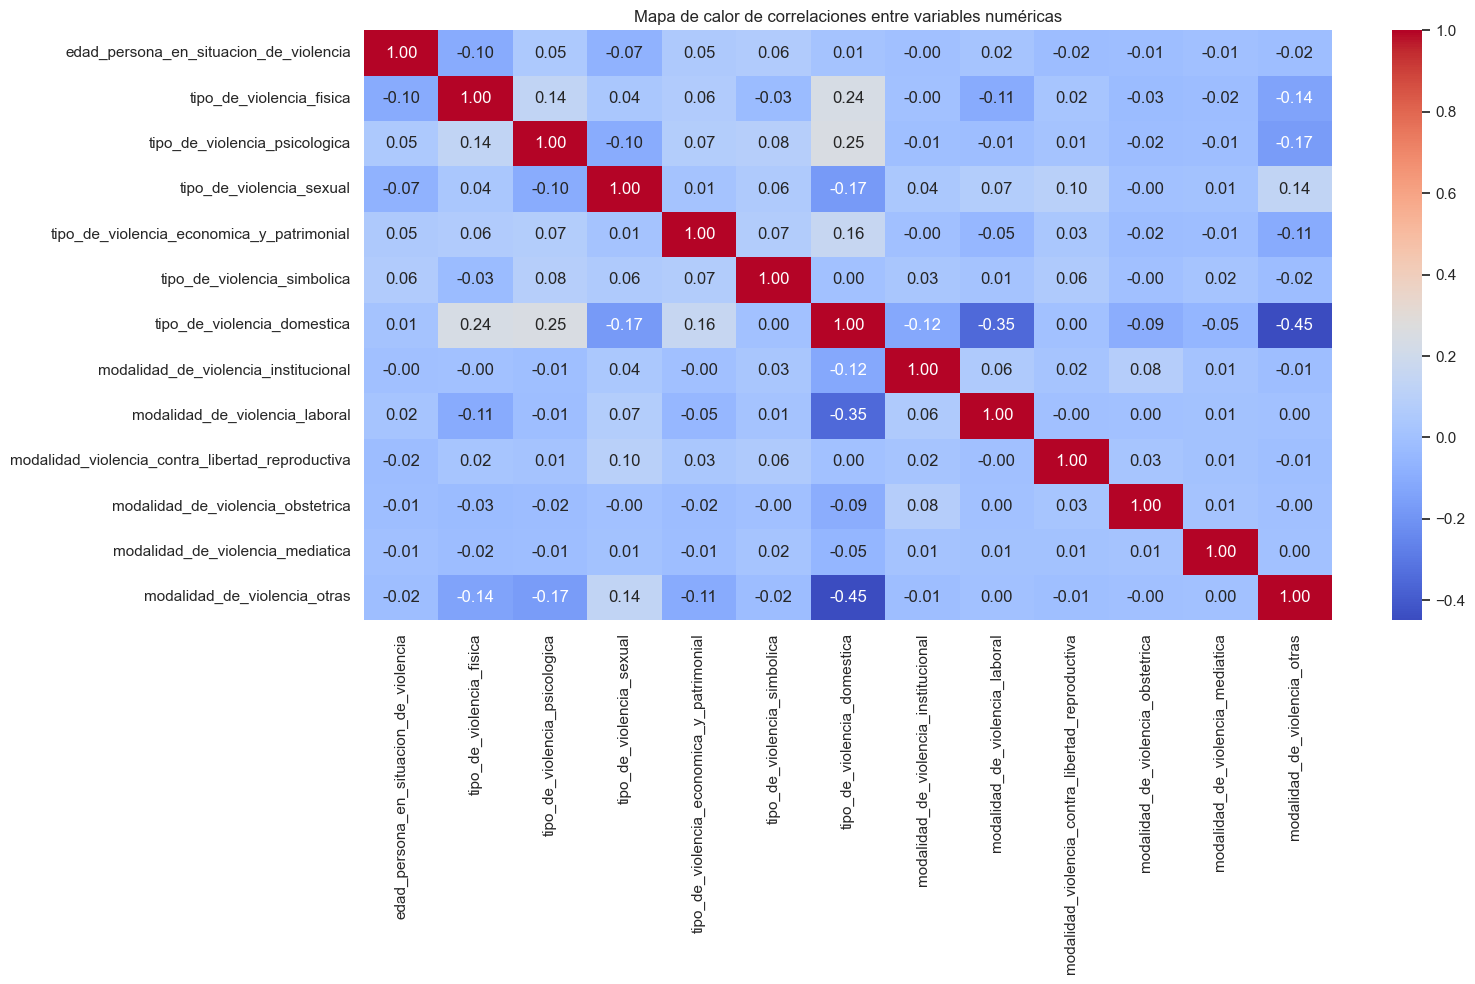

In [51]:
#Mapa de calor 
#Filtrar solo columnas numéricas (int, float, etc.)
df_numerico = df_final.select_dtypes(include=['number'])

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(16, 10))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

In [ ]:
Sirve para clasificar mis datos.
import numpy as np

# Crear una columna que indique si hay al menos un tipo de violencia
tipos_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica'
]

df_final["hay_violencia"] = df_final[tipos_violencia].any(axis=1)

# Condiciones para violencia de género
cond_violencia_genero = (
    (df_final["genero_persona_en_situacion_de_violencia_mujer"] == True) &
    (df_final["hay_violencia"] == True) &
    (df_final["genero_de_la_persona_agresora_varon"] == True) &
    (
        (df_final["vinculo_con_la_persona_agresora_superior jerarquico"] == True) |
        (df_final["vinculo_con_la_persona_agresora_otro"] == True) |
        (df_final["vinculo_con_la_persona_agresora_ex pareja"] == True)
    )
)

# Condiciones para violencia familiar
cond_violencia_familiar = (
    (df_final["genero_persona_en_situacion_de_violencia_mujer"] == True) &
    (df_final["hay_violencia"] == True) &
    (df_final["genero_de_la_persona_agresora_varon"] == True) &
    (
        (df_final["vinculo_con_la_persona_agresora_pareja"] == True) |
        (df_final["vinculo_con_la_persona_agresora_madre o tutor"] == True) |
        (df_final["vinculo_con_la_persona_agresora_otro familiar"] == True) |
        (df_final["vinculo_con_la_persona_agresora_padre o tutor"] == True)
    )
)

# Condición para violencia de riña (si hay violencia pero no se cumple género ni familiar)
cond_violencia_rina = (
    (df_final["hay_violencia"] == True) &
    ~(cond_violencia_genero | cond_violencia_familiar)
)

# Clasificación de los casos
df_final["clasificacion_violencia"] = np.select(
    [cond_violencia_genero, cond_violencia_familiar, cond_violencia_rina],
    ["Violencia de género", "Violencia familiar", "Violencia de riña"],
    default="Otro tipo de violencia"
)
df_final.head(10)

In [77]:
# Crear dataTDF con los datos de Tierra del Fuego, Antártida e Islas del Atlántico Sur
provincias_tdf = ['tierra del fuego, antartida e islas del atlantico sur']
dataTDF = df_final[df_final['prov_residencia_persona_en_situacion_violencia'].isin(provincias_tdf)].copy()

# Crear dataSInTDF con los datos de todas las demás provincias
dataSInTDF = df_final[~df_final['prov_residencia_persona_en_situacion_violencia'].isin(provincias_tdf)].copy()

In [75]:
#Ahora puedes inspeccionar los nuevos DataFrames
print("DataFrame dataTDF:")
dataTDF.head()
dataTDF.shape[0]

DataFrame dataTDF:


81

In [83]:
#Ahora puedes inspeccionar los nuevos DataFrames
print("DataFrame dataSinTDF:")
dataSInTDF.head()
dataSInTDF.shape[0]

DataFrame dataSinTDF:


89448